# Verbinding met SQL

In [1]:
import pyodbc
import pandas as pd

# Database connectiegegevens
DB = {'servername': 'BOOK-CG1LSBSBIK\\SQLEXPRESS', 'database': 'AdventureWorks2019'}
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+ DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=yes')

# Query om maandelijkse verkoopcijfers op te halen
query = """
SELECT 
    YEAR(OrderDate) AS Year, 
    MONTH(OrderDate) AS Month, 
    SUM(TotalDue) AS MonthlySales
FROM 
    Sales.SalesOrderHeader
GROUP BY 
    YEAR(OrderDate), 
    MONTH(OrderDate)
ORDER BY 
    Year, 
    Month;
"""

# Haal de gegevens op en zet ze in een pandas DataFrame
df = pd.read_sql(query, conn)


C:\Users\prati\AppData\Local\Temp\ipykernel_23888\685701952.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\prati\AppData\Local\Temp\ipykernel_23888\685701952.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Dataset voorbereiden

In [2]:
# Voeg een seizoensvariabele toe
df['Season'] = df['Month'].apply(lambda x: (x % 12 + 3) // 3) # Winter=1, Spring=2, Summer=3, Fall=4

# Features en target
X = df[['Month', 'Season']]
y = df['MonthlySales']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Linear Regressiemodel bouwen

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Lineaire regressie model
model = LinearRegression()
model.fit(X_train, y_train)

# Voorspellingen voor de gehele dataset
y_pred_full = model.predict(X)

# Voorspellingen voor de testset
y_pred_test = model.predict(X_test)

# Evaluatie van het model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Root Mean Squared Error: 2017727.2877241396
Coefficients: [-29157.18151647 218025.24668864]
Intercept: 2891486.6391290203


# Resultaten visualiseren

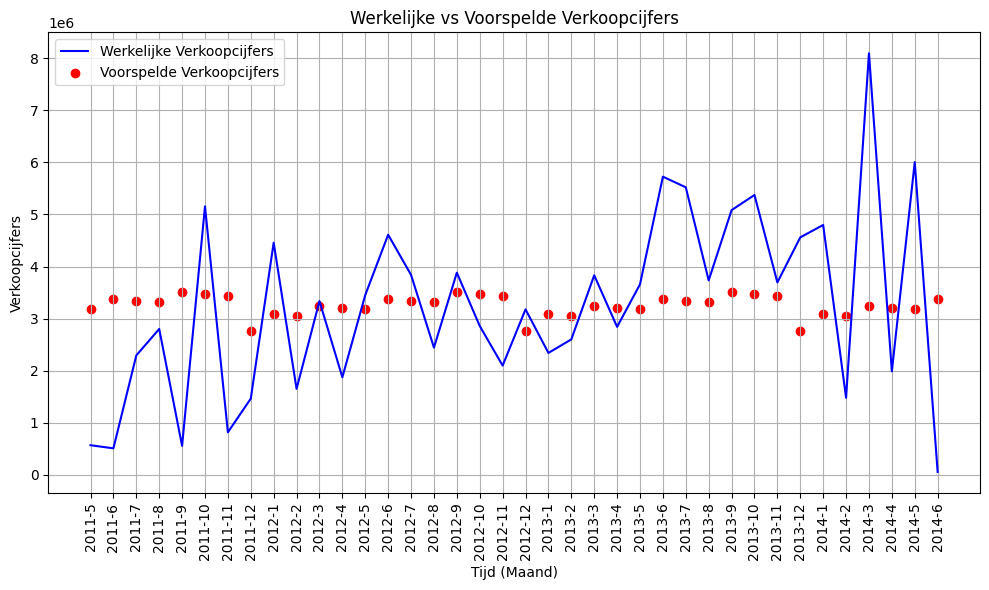

In [4]:
# Visualisatie van de resultaten
plt.figure(figsize=(10, 6))
plt.plot(df['Year'].astype(str) + '-' + df['Month'].astype(str), df['MonthlySales'], label='Werkelijke Verkoopcijfers', color='blue')
plt.scatter(df['Year'].astype(str) + '-' + df['Month'].astype(str), y_pred_full, color='red', label='Voorspelde Verkoopcijfers')
plt.xlabel('Tijd (Maand)')
plt.ylabel('Verkoopcijfers')
plt.title('Werkelijke vs Voorspelde Verkoopcijfers')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()
